In [26]:
from sklearn.datasets import load_wine,load_iris

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import math
import matplotlib.pylab as plt
import pandas as pd
import uuid

pd.options.display.float_format = "{:,.4f}".format

In [27]:
flower =load_iris()
X= flower.data
y = flower.target

iris = pd.DataFrame(flower.data,columns=["sepal length","sepal width","petal length","petal width"])
iris["target"] = flower.target



In [28]:
def find_prob(df):
    total = (df.count().sum())
    prob_dict = {}
    for name,group in df:
        prob_dict[name] = ( ((group[group.columns[0]].count())/ total).values[0])
        
    return prob_dict

def prob_square(dictionary):
    for key in list(dictionary.keys()):
        dictionary[key] **= 2
#         print(dictionary[key] ** 2)
    
    return dictionary

def get_entropy(dictionary):
    entropy = 0
    for key,value in dictionary.items():
        temp_value = value* math.log(value,2)
        entropy = entropy - temp_value
    
#     print(entropy)
    return entropy

def split_data(df,key):
#     p
    left = df[df[df.columns[0]] <= key].groupby("target")
    right = df[df[df.columns[0]] > key].groupby("target")
    return left,right

In [29]:
# total=150
def feature_value_gini(set1,depth):
    set1_temp1 = set1.sort_values(set1.columns[0])
    avg = list(pd.unique(set1_temp1[set1_temp1.columns[0]].rolling(2).mean()))
    value_gini  = {}
    value_gini  = {}
    entropy = {}
    ig ={}
    for i in avg:
        if math.isnan(i):
            continue

#         left = set1_temp1[set1_temp1[set1_temp1.columns[0]] < i].groupby("target")
#         right = set1_temp1[set1_temp1[set1_temp1.columns[0]] > i].groupby("target")
        left,right = split_data(set1_temp1,i)
        
        l_prob =find_prob(left)
        r_prob = find_prob(right)
        prob = dict(l_prob)
        prob.update(r_prob)

        l_total = left.count().values.sum()
        r_total = right.count().values.sum()
#         print(left.size())
        total  =  l_total + r_total 
#         total =150
        l_prob_sq = prob_square(find_prob(left))
        r_prob_sq = prob_square(find_prob(right))

        gini_left = 1-sum(l_prob_sq.values())
        gini_right =  1-sum(r_prob_sq.values())

        wt_gini = ((l_total/total) * gini_left) + ((r_total/total) * gini_right)
        
#         root_entropy =  round(get_entropy(prob),3)
#         l_entropy = round(get_entropy(l_prob),3)
#         r_entropy = round(get_entropy(r_prob),3)
        
        
        value_gini [round(i,3)] = round(wt_gini,3)
#         entropy[round(i,3)] = root_entropy
#         ig [round(i,3)] = (root_entropy - ((l_total/total)*l_entropy) + ((r_total/total)*r_entropy))

        
    
#     key = max(value_gini.items(), key=lambda x: x[1])[0]
#     print()
    
    return value_gini
# ,entropy,ig
#     return value_gini

In [30]:
# global rule = 1
def split_whole_data(df,point):
#     for df point
    attr = point.f_name.values[0]
    cond = point.x.values[0]
    left = df [df[str(attr)] <= cond ]
    right = df [df[str(attr) ] > cond ]
#     print(right.shape)
    print("condition")
    print(attr+ "<="+str(cond))

# #     for tuple
#     attr = point[0]
#     cond = point[1][0]
#     print("condition")
#     print(attr+ "<="+str(cond))
# #     print(cond)
#     left = df [df[attr] <= cond ]
#     right = df [df[attr] > cond ]
    return left,right

In [31]:
def get_gini(df_group):
#     split = df.groupby("target")
    split = df_group
    elements = list(split.size())
    total_elements = split.size().sum()
    prob = [x/total_elements for x in elements]
    prob_sq = [x **2 for x in prob]
    gini = 1 - sum(prob_sq)
    return gini


def plot_gini(gini_value,depth,j,i):
    unique_filename = "depth_"+str(depth)+"____"+str(uuid.uuid4())
#     print(unique_filename)

    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(18.5, 10.5)
    fig.suptitle('Gini Impurity for feature values at depth:'+str(depth), fontsize=24)
    lists = sorted(gini_value.items())
    x, y = zip(*lists)
    min_val = min(gini_value.items(), key=lambda x: x[1])
    print(min_val)
    if j == 0:
        axs[0,0].plot(x,y)
        axs[0, 0].set_title(i+" min gini impurity value "+str(round(min_val[1],2))+" at "+str(round(min_val[0],2)),fontsize=18)
    if j == 1:
        axs[0,1].plot(x,y,'tab:orange')
        axs[0, 1].set_title(i+" min gini impurity value "+str(round(min_val[1],2))+" at "+str(round(min_val[0],2)),fontsize=18)
    if j == 2:
        axs[1,0].plot(x,y,'tab:green')
        axs[1, 0].set_title(i+" min gini impurity value "+str(round(min_val[1],2))+" at "+str(round(min_val[0],2)),fontsize=18)
    if j == 3:
        axs[1,1].plot(x,y, 'tab:red')
        axs[1, 1].set_title(i+" min gini impurity value "+str(round(min_val[1],2))+" at "+str(round(min_val[0],2)),fontsize=18)
    fig.tight_layout(pad=3.0)
    fig.savefig("comparison/"+unique_filename+'.png',dpi=120)

In [41]:
counter = 0
def node(dataframe,depth):
    global counter
    counter = counter+1
    print("Node "+str(counter)+" gini val")
    
    gini =get_gini(dataframe.groupby("target")) 
    print(gini)
    
    
#     print(dataframe.groupby('target').size())
    if len(list(dataframe.groupby('target').size())) == 1:
        print("pure leaf node at ",depth)
        return 
    min_gini_feature = {}
    entropy_features ={}
    max_ig={}
    result = {}
    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(18.5, 10.5)
    fig.suptitle('Gini Impurity for feature values at depth:'+str(depth), fontsize=24)
    
    for i in dataframe.columns[:-1]:
        j = iris.columns.get_loc(i)
        set1 = dataframe[[i,dataframe.columns[-1]]]
#         value_gini,entropy,ig = feature_value_gini(set1,depth+1)
        value_gini = feature_value_gini(set1,depth+1)

    #     print(value_gini)
        data = {"x":list(value_gini),"gini":list(value_gini.values())
#                 ,"entropy":list(entropy.values()),"IG":list(ig.values())
               }
        res = pd.DataFrame.from_dict(data)
        result [i] = res
#         min_gini_feature[i] = min(value_gini.items(), key=lambda x: x[1])
        
        lists = sorted(value_gini.items())
        x, y = zip(*lists)
        min_val = min(value_gini.items(), key=lambda x: x[1])
        if j == 0:
            axs[0,0].plot(x,y)
            axs[0, 0].set_title(i+" min gini impurity value "+str(round(min_val[1],2))+" at "+str(round(min_val[0],2)),fontsize=18)
        if j == 1:
            axs[0,1].plot(x,y,'tab:orange')
            axs[0, 1].set_title(i+" min gini impurity value "+str(round(min_val[1],2))+" at "+str(round(min_val[0],2)),fontsize=18)
        if j == 2:
            axs[1,0].plot(x,y,'tab:green')
            axs[1, 0].set_title(i+" min gini impurity value "+str(round(min_val[1],2))+" at "+str(round(min_val[0],2)),fontsize=18)
        if j == 3:
            axs[1,1].plot(x,y, 'tab:red')
            axs[1, 1].set_title(i+" min gini impurity value "+str(round(min_val[1],2))+" at "+str(round(min_val[0],2)),fontsize=18)
    fig.tight_layout(pad=3.0)
    unique_filename = "depth_"+str(depth)+"____"+str(uuid.uuid4())
    fig.savefig("comparison/"+unique_filename+'.png',dpi=120)
#         plot_gini(value_gini,depth,j,i)
    
#     print(list(result.keys()))
    zz=pd.DataFrame()
    zz=zz.append(result[list(result.keys())[0]].nsmallest(1,['gini']))
    zz=zz.append(result[list(result.keys())[1]].nsmallest(1,['gini']))
    zz=zz.append(result[list(result.keys())[2]].nsmallest(1,['gini']))
    zz=zz.append(result[list(result.keys())[3]].nsmallest(1,['gini']))
    zz["f_name"] = dataframe.columns[:-1].values
    
    print("******************************************")
    print(zz)
    print("******************************************")
    point = pd.DataFrame(zz.nsmallest(1,['gini','x']) )
#     print(point.gini.values)
#     if point.gini.values == 0:
#         print("leaf node at depth:", depth)
#     else:
    print("best split at depth",depth)
#     param= min(min_gini_feature.items(), key=lambda x: x[1])
#     print(min_gini_feature)
#     print(param[0])
#     print(type(param[0]))
#         print(point.IG.values[0])
#         if point.IG.values[0] ==0.0:
#             print("0 gain with split")
#             return 
    left,right = split_whole_data(dataframe,point)
#     left,right = split_whole_data(dataframe,param)
    print("left node at depth ",depth)
    node(left,depth+1)
    print("right node at depth ",depth)
    node(right,depth+1)

Node 18 gini val
0.6666666666666667
******************************************
        x   gini        f_name
19 5.4000 0.4390  sepal length
23 3.3000 0.5400   sepal width
14 1.9000 0.3330  petal length
9  0.8000 0.3330   petal width
******************************************
best split at depth 0
condition
petal width<=0.8
left node at depth  0
Node 19 gini val
0.0
pure leaf node at  1
right node at depth  0
Node 20 gini val
0.5
******************************************
        x   gini        f_name
19 6.1000 0.3930  sepal length
5  2.4000 0.4640   sepal width
24 4.7000 0.1260  petal length
14 1.7000 0.1100   petal width
******************************************
best split at depth 1
condition
petal width<=1.7
left node at depth  1
Node 21 gini val
0.16803840877914955
******************************************
        x   gini        f_name
33 7.1000 0.1370  sepal length
9  2.6000 0.1630   sepal width
27 4.9000 0.0860  petal length
6  1.3000 0.1500   petal width
*******************

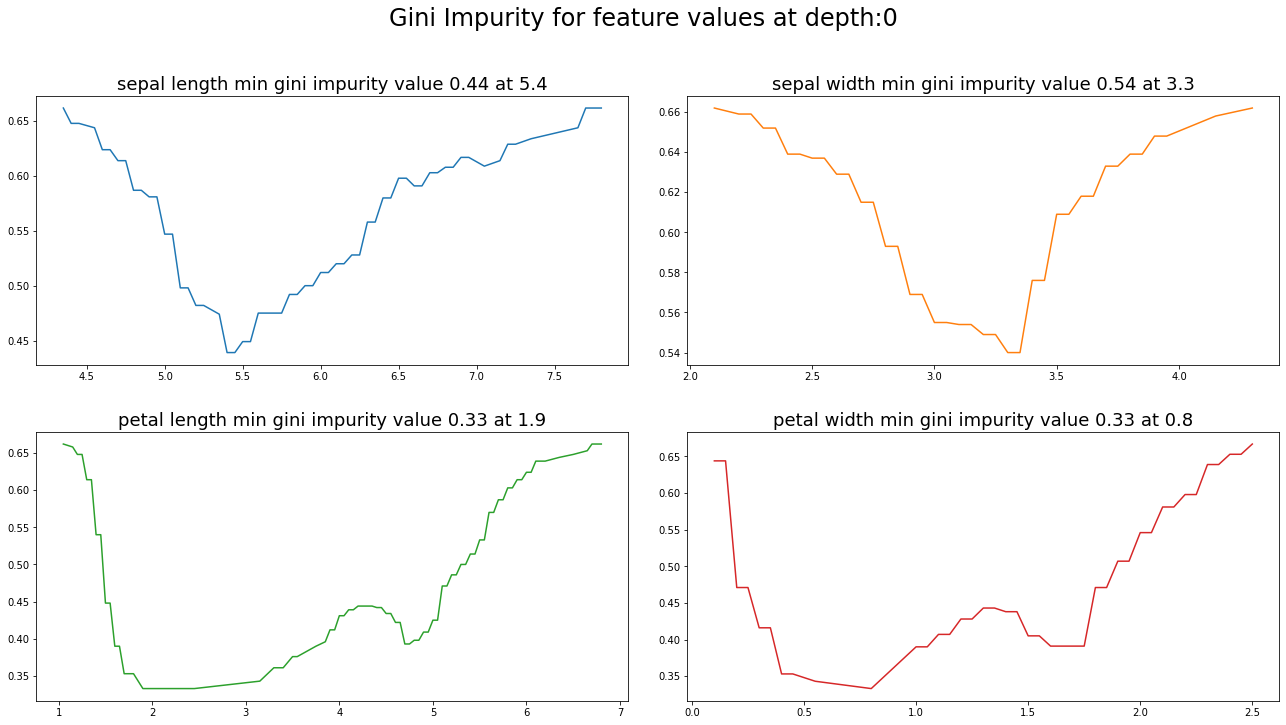

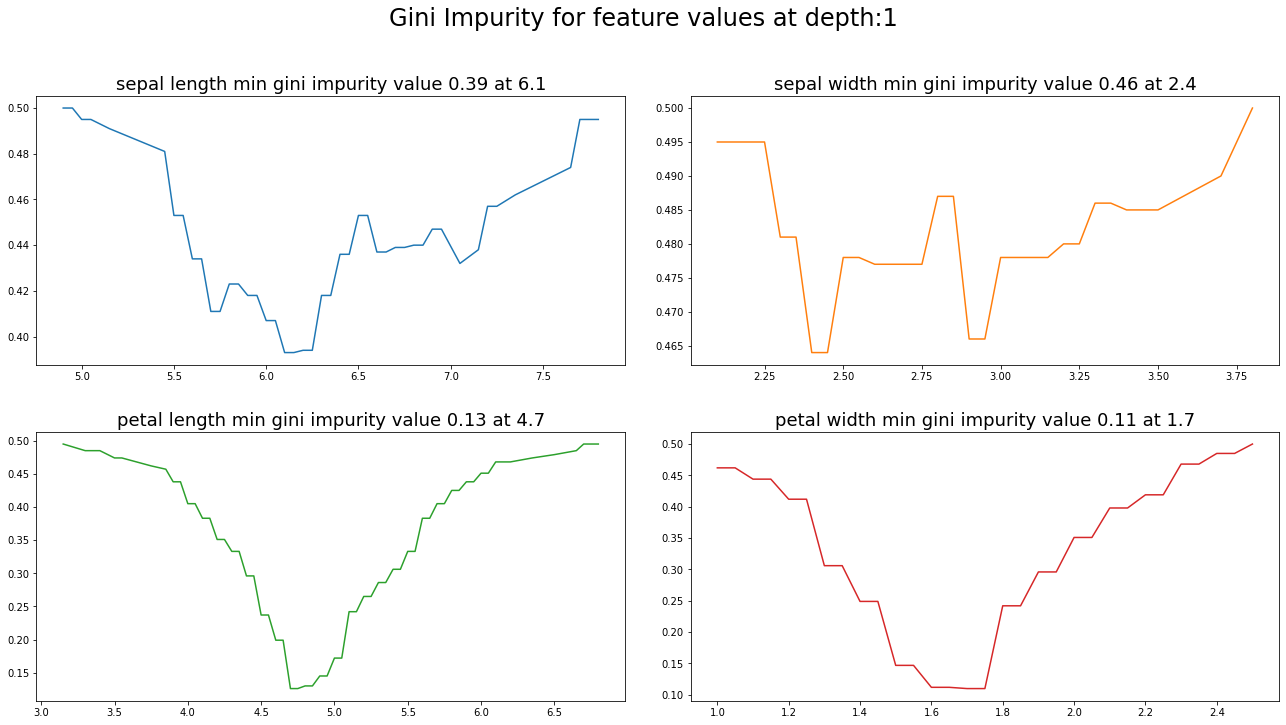

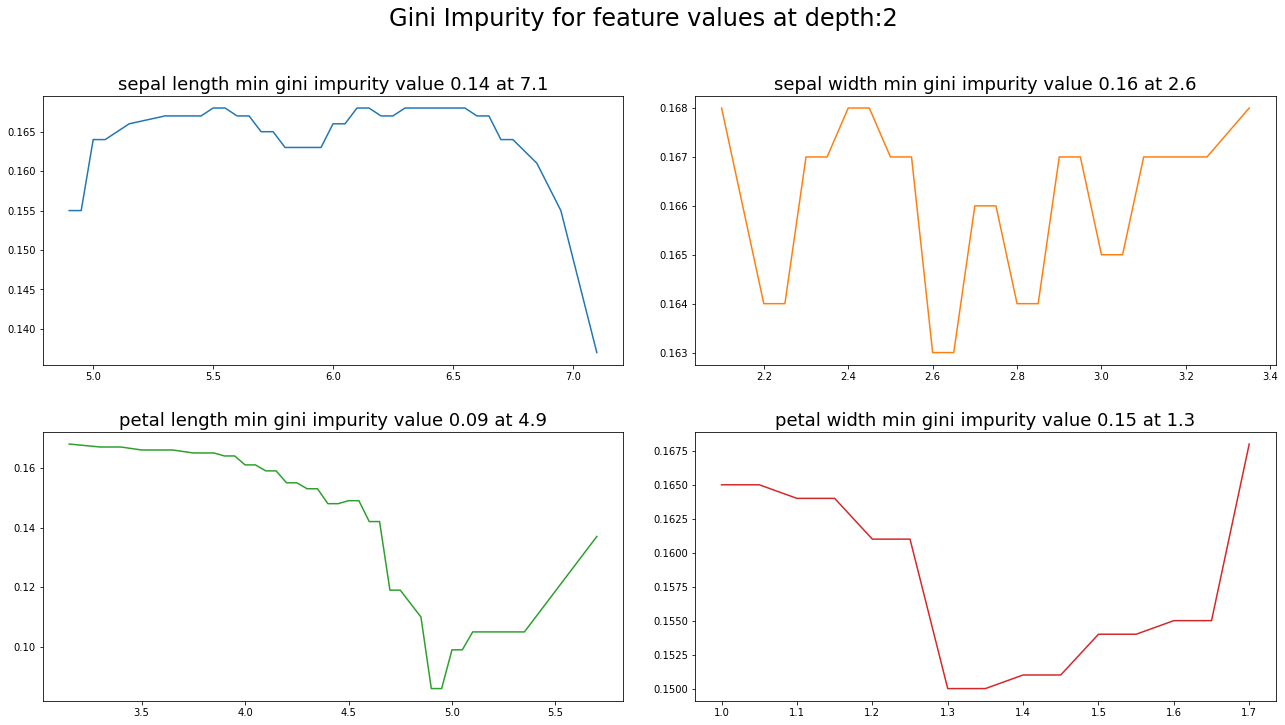

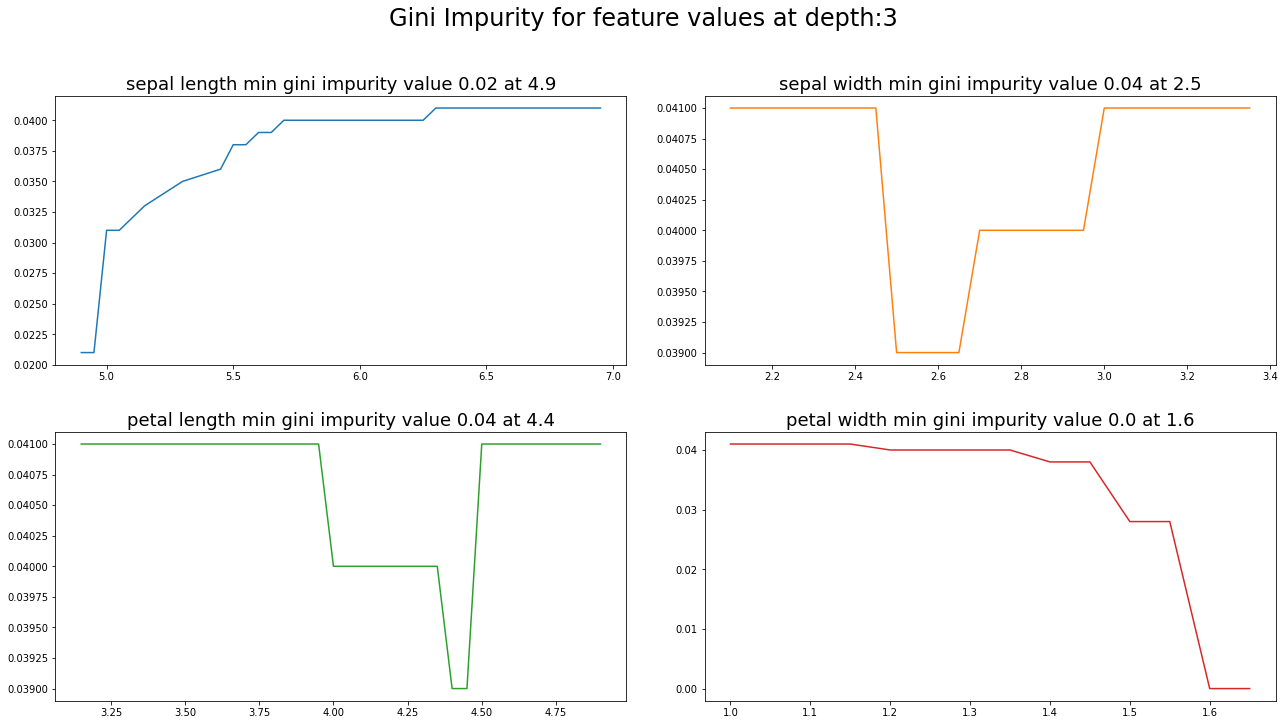

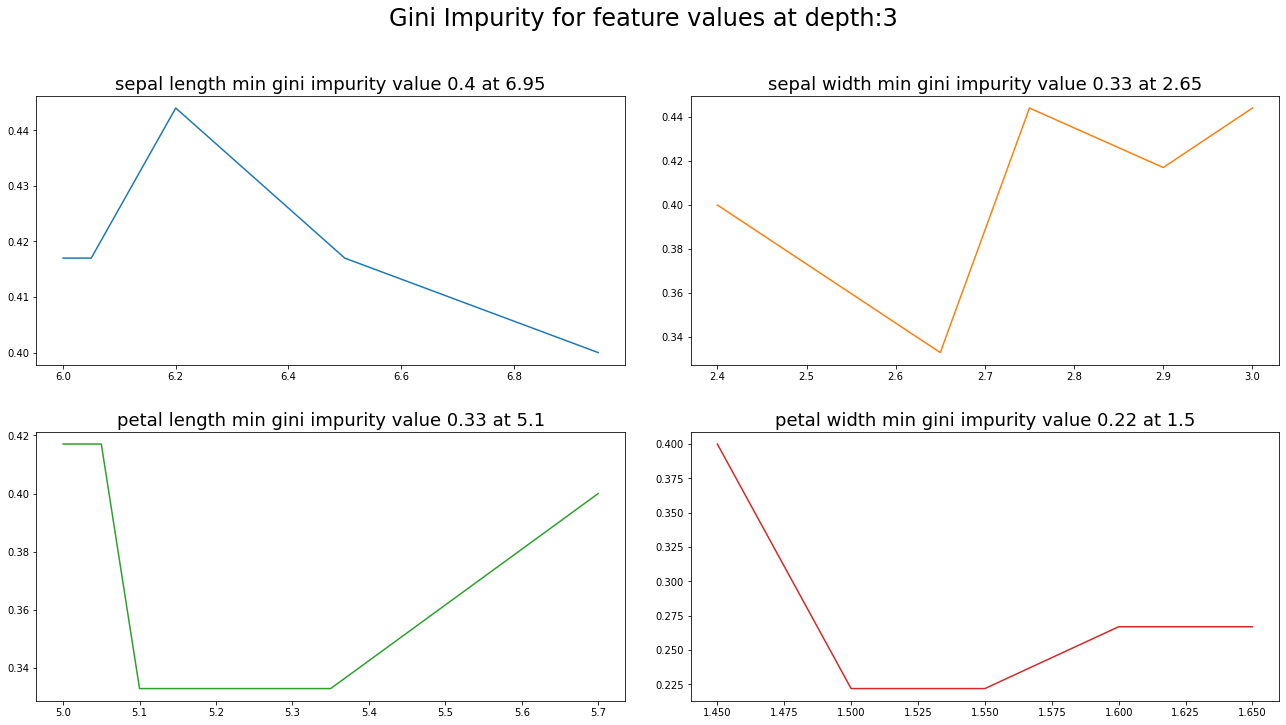

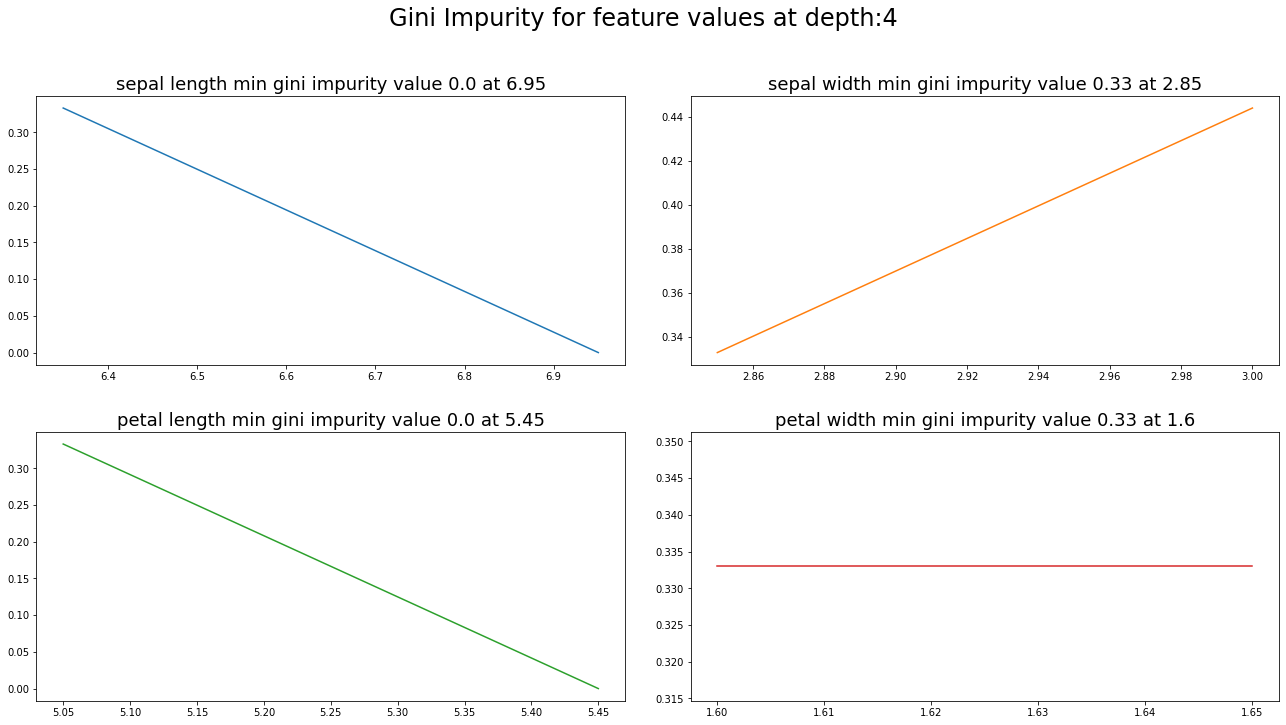

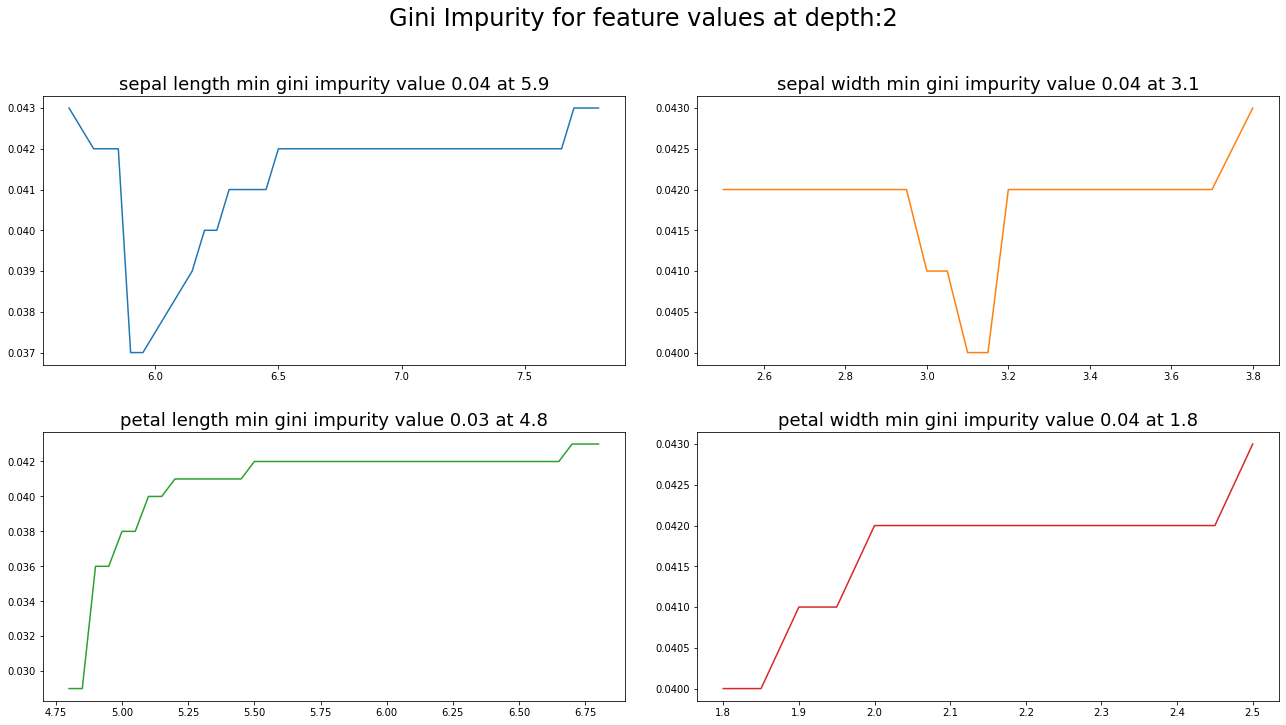

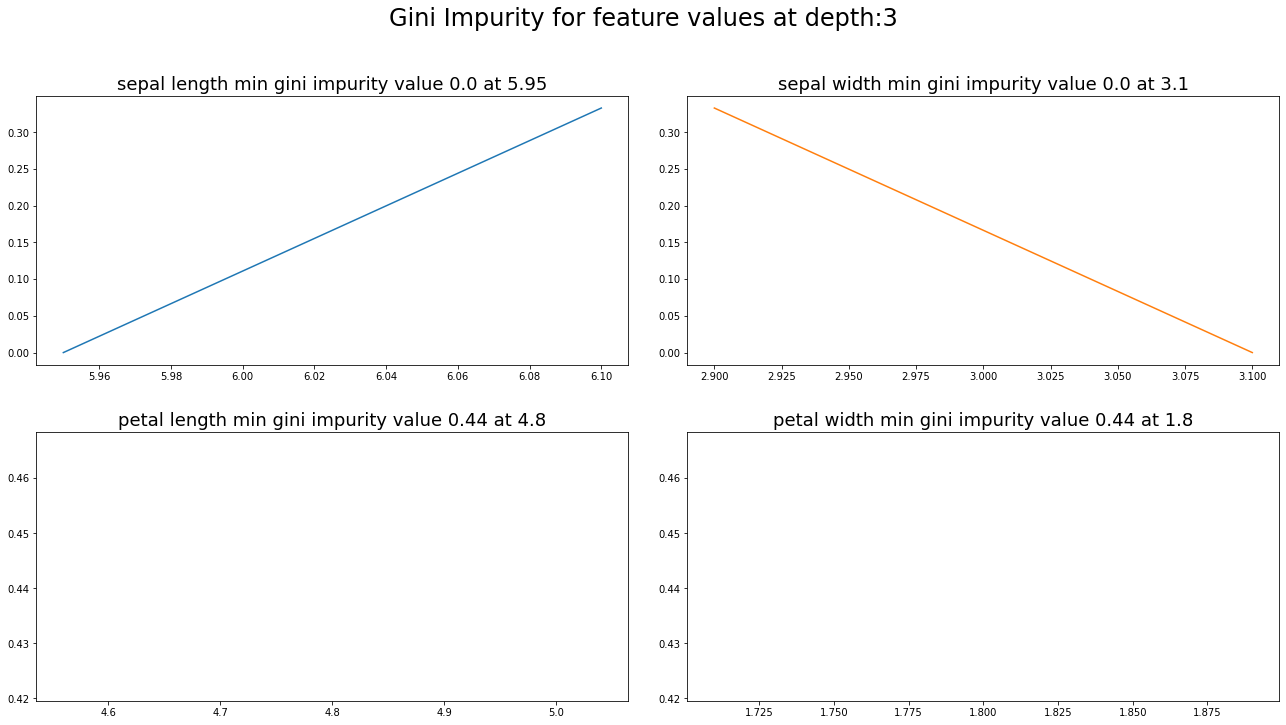

In [43]:
node(iris,0)